<a href="https://colab.research.google.com/github/MuhammadMuneebFida/MSDS19091_COVID19_DLSpring2020/blob/master/MSDS19091_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG Task 1

In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"

In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'

In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])
#pass transform here-in
train_data = torchvision.datasets.ImageFolder(trainPath , transform=train_transforms)
valid_data=torchvision.datasets.ImageFolder(validPath , transform=train_transforms)
test_data = datasets.ImageFolder(testPath, transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True,num_workers=4)
validloader=torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=True,num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True,num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)# Load the pretrained model from pytorch

vgg16 = models.vgg16(pretrained=True)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)# Load the pretrained model from pytorch

vgg16 = models.vgg16(pretrained=True)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

# num_features = vgg16.classifier[6].in_features
# features = list(vgg16.classifier.children())[:] 

# vgg16.classifier[6].out_features = 1000

features=([nn.Linear(25088,1000),nn.ReLU(inplace=True),nn.Linear(1000, 2),nn.Sigmoid()])

print(features)

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.requires_grad = False


In [0]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)

In [0]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.1, momentum=0.6)

In [0]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.1, momentum=0.6)
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   

   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss

      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
          # print statistics
      accuracy=correct*100/total
      running_loss += loss.item()
      
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))
   return running_loss,len(data),accuracy

In [0]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
for epoch in range(Epochs):  # loop over the dataset multiple times
    vgg16.train()
    acc=[]
    temp=[]
    running_loss = 0.0
    l=0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        l=len(data)
        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update
        
        _,pred=torch.max(outputs.data,dim=1)        
        
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        accuracy=correct*100/total
        temp.append(accuracy)
        losssssList.append(loss.item())
        # running_loss += loss.item()
        # print(running_loss/len(trainloader))
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
    vgg16.eval()
    
    epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
    meanTerror.append(epoch_loss_train)
    
    tAccu=np.asarray(temp)
    meanTrainAccuracy=np.mean(tAccu)
    meanTrain.append(meanTrainAccuracy)

    los,dataLen,validAccu=validLos(validloader)
    epoch_loss = los/ dataLen
    meanVerror.append(epoch_loss)
    acc.append(validAccu)
    acc=np.asarray(acc)

    meanAccu=np.mean(acc)
    meanValid.append(meanAccu)
    print(meanAccu,"Mean Validation Accracy\n",meanTrainAccuracy,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
    torch.save(vgg16.state_dict(), 'vgg16_ft.pth')

plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')

In [0]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# VGG Task 2


In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).
Archive:  ./gdrive/My Drive/Assignment 5 Dataset.zip
replace Assignment 5 Dataset/desktop.ini? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


In [0]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])
#pass transform here-in
train_data = torchvision.datasets.ImageFolder(trainPath , transform=train_transforms)
valid_data=torchvision.datasets.ImageFolder(validPath , transform=train_transforms)
test_data = datasets.ImageFolder(testPath, transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True,num_workers=4)
validloader=torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True,num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True,num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


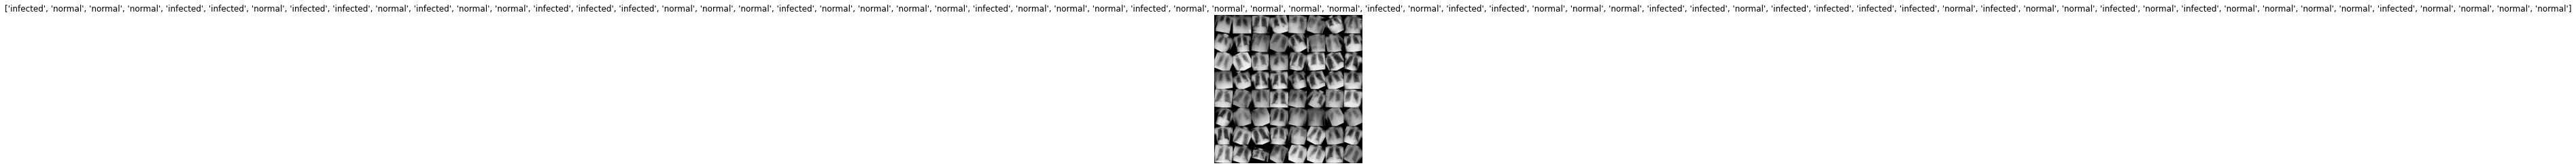

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

In [0]:
# Load the pretrained model from pytorch

vgg16 = models.vgg16(pretrained=True)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
# num_features = vgg16.classifier[6].in_features
# features = list(vgg16.classifier.children())[:] 

# vgg16.classifier[6].out_features = 1000

features=([nn.Linear(25088,1000),nn.ReLU(inplace=True),nn.Linear(1000, 2),nn.Sigmoid()])

print(features)

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.requires_grad = True

[Linear(in_features=25088, out_features=1000, bias=True), ReLU(inplace=True), Linear(in_features=1000, out_features=2, bias=True), Sigmoid()]


In [0]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
# optimizerResnet = optim.SGD(ResNet-18.parameters(), lr=0.1, momentum=0.9)

In [0]:
def confusionMatrix(targets,all_pred):
  cm=confusion_matrix(y_true=targets,y_pred=all_pred)
  # print(cm)
  return cm

In [0]:
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   

   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss

      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
          # print statistics
      accuracy=correct*100/total
      running_loss += loss.item()
      
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))
   return running_loss,len(data),accuracy




0it [00:00, ?it/s]


Train Epoch: 0 [0/12000 (0%)]	Loss: 0.334725: : 0it [00:04, ?it/s]


Train Epoch: 0 [0/12000 (0%)]	Loss: 0.334725: : 1it [00:04,  4.75s/it]


Train Epoch: 0 [64/12000 (1%)]	Loss: 0.315430: : 1it [00:06,  4.75s/it]


Train Epoch: 0 [64/12000 (1%)]	Loss: 0.315430: : 2it [00:06,  3.91s/it]


Train Epoch: 0 [128/12000 (1%)]	Loss: 0.414616: : 2it [00:08,  3.91s/it]


Train Epoch: 0 [128/12000 (1%)]	Loss: 0.414616: : 3it [00:08,  3.33s/it]


Train Epoch: 0 [192/12000 (2%)]	Loss: 0.354789: : 3it [00:10,  3.33s/it]


Train Epoch: 0 [192/12000 (2%)]	Loss: 0.354789: : 4it [00:10,  2.91s/it]


Train Epoch: 0 [256/12000 (2%)]	Loss: 0.365729: : 4it [00:12,  2.91s/it]


Train Epoch: 0 [256/12000 (2%)]	Loss: 0.365729: : 5it [00:12,  2.63s/it]


Train Epoch: 0 [320/12000 (3%)]	Loss: 0.397385: : 5it [00:14,  2.63s/it]


Train Epoch: 0 [320/12000 (3%)]	Loss: 0.397385: : 6it [00:14,  2.43s/it]


Train Epoch: 0 [384/12000 (3%)]	Loss: 0.383245: : 6it [00:16,  2.43s/it]


Train Epoch

90.93333333333334 Mean Validation Accracy
 93.92255773937136 Mean Train Accuracy 4.774054527282715 Epoch Validation Loss 0.37396308145624524 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 1 [0/12000 (0%)]	Loss: 0.386847: : 0it [00:04, ?it/s]


Train Epoch: 1 [0/12000 (0%)]	Loss: 0.386847: : 1it [00:04,  4.45s/it]


Train Epoch: 1 [64/12000 (1%)]	Loss: 0.370540: : 1it [00:06,  4.45s/it]


Train Epoch: 1 [64/12000 (1%)]	Loss: 0.370540: : 2it [00:06,  3.70s/it]


Train Epoch: 1 [128/12000 (1%)]	Loss: 0.344258: : 2it [00:08,  3.70s/it]


Train Epoch: 1 [128/12000 (1%)]	Loss: 0.344258: : 3it [00:08,  3.18s/it]


Train Epoch: 1 [192/12000 (2%)]	Loss: 0.358986: : 3it [00:10,  3.18s/it]


Train Epoch: 1 [192/12000 (2%)]	Loss: 0.358986: : 4it [00:10,  2.81s/it]


Train Epoch: 1 [256/12000 (2%)]	Loss: 0.381816: : 4it [00:12,  2.81s/it]


Train Epoch: 1 [256/12000 (2%)]	Loss: 0.381816: : 5it [00:12,  2.56s/it]


Train Epoch: 1 [320/12000 (3%)]	Loss: 0.405245: : 5it [00:14,  2.56s/it]


Train Epoch: 1 [320/12000 (3%)]	Loss: 0.405245: : 6it [00:14,  2.37s/it]


Train Epoch: 1 [384/12000 (3%)]	Loss: 0.351216: : 6it [00:16,  2.37s/it]


Train Epoch

90.4 Mean Validation Accracy
 93.86557634395788 Mean Train Accuracy 4.869680657982826 Epoch Validation Loss 0.3721803853169401 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 2 [0/12000 (0%)]	Loss: 0.398325: : 0it [00:04, ?it/s]


Train Epoch: 2 [0/12000 (0%)]	Loss: 0.398325: : 1it [00:04,  4.27s/it]


Train Epoch: 2 [64/12000 (1%)]	Loss: 0.349908: : 1it [00:06,  4.27s/it]


Train Epoch: 2 [64/12000 (1%)]	Loss: 0.349908: : 2it [00:06,  3.58s/it]


Train Epoch: 2 [128/12000 (1%)]	Loss: 0.376624: : 2it [00:08,  3.58s/it]


Train Epoch: 2 [128/12000 (1%)]	Loss: 0.376624: : 3it [00:08,  3.09s/it]


Train Epoch: 2 [192/12000 (2%)]	Loss: 0.347677: : 3it [00:10,  3.09s/it]


Train Epoch: 2 [192/12000 (2%)]	Loss: 0.347677: : 4it [00:10,  2.74s/it]


Train Epoch: 2 [256/12000 (2%)]	Loss: 0.378756: : 4it [00:12,  2.74s/it]


Train Epoch: 2 [256/12000 (2%)]	Loss: 0.378756: : 5it [00:12,  2.51s/it]


Train Epoch: 2 [320/12000 (3%)]	Loss: 0.435657: : 5it [00:14,  2.51s/it]


Train Epoch: 2 [320/12000 (3%)]	Loss: 0.435657: : 6it [00:14,  2.34s/it]


Train Epoch: 2 [384/12000 (3%)]	Loss: 0.379017: : 6it [00:15,  2.34s/it]


Train Epoch

89.46666666666667 Mean Validation Accracy
 93.89916748895361 Mean Train Accuracy 4.952295958995819 Epoch Validation Loss 0.37275849325014343 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 3 [0/12000 (0%)]	Loss: 0.331043: : 0it [00:04, ?it/s]


Train Epoch: 3 [0/12000 (0%)]	Loss: 0.331043: : 1it [00:04,  4.33s/it]


Train Epoch: 3 [64/12000 (1%)]	Loss: 0.429226: : 1it [00:06,  4.33s/it]


Train Epoch: 3 [64/12000 (1%)]	Loss: 0.429226: : 2it [00:06,  3.62s/it]


Train Epoch: 3 [128/12000 (1%)]	Loss: 0.403312: : 2it [00:08,  3.62s/it]


Train Epoch: 3 [128/12000 (1%)]	Loss: 0.403312: : 3it [00:08,  3.12s/it]


Train Epoch: 3 [192/12000 (2%)]	Loss: 0.382499: : 3it [00:10,  3.12s/it]


Train Epoch: 3 [192/12000 (2%)]	Loss: 0.382499: : 4it [00:10,  2.76s/it]


Train Epoch: 3 [256/12000 (2%)]	Loss: 0.385393: : 4it [00:12,  2.76s/it]


Train Epoch: 3 [256/12000 (2%)]	Loss: 0.385393: : 5it [00:12,  2.53s/it]


Train Epoch: 3 [320/12000 (3%)]	Loss: 0.393867: : 5it [00:14,  2.53s/it]


Train Epoch: 3 [320/12000 (3%)]	Loss: 0.393867: : 6it [00:14,  2.35s/it]


Train Epoch: 3 [384/12000 (3%)]	Loss: 0.395289: : 6it [00:16,  2.35s/it]


Train Epoch

91.0 Mean Validation Accracy
 93.87725458588497 Mean Train Accuracy 4.778207570314407 Epoch Validation Loss 0.3723285588970844 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 4 [0/12000 (0%)]	Loss: 0.367360: : 0it [00:04, ?it/s]


Train Epoch: 4 [0/12000 (0%)]	Loss: 0.367360: : 1it [00:04,  4.30s/it]


Train Epoch: 4 [64/12000 (1%)]	Loss: 0.363385: : 1it [00:06,  4.30s/it]


Train Epoch: 4 [64/12000 (1%)]	Loss: 0.363385: : 2it [00:06,  3.60s/it]


Train Epoch: 4 [128/12000 (1%)]	Loss: 0.332571: : 2it [00:08,  3.60s/it]


Train Epoch: 4 [128/12000 (1%)]	Loss: 0.332571: : 3it [00:08,  3.11s/it]


Train Epoch: 4 [192/12000 (2%)]	Loss: 0.379827: : 3it [00:10,  3.11s/it]


Train Epoch: 4 [192/12000 (2%)]	Loss: 0.379827: : 4it [00:10,  2.76s/it]


Train Epoch: 4 [256/12000 (2%)]	Loss: 0.388260: : 4it [00:12,  2.76s/it]


Train Epoch: 4 [256/12000 (2%)]	Loss: 0.388260: : 5it [00:12,  2.52s/it]


Train Epoch: 4 [320/12000 (3%)]	Loss: 0.433051: : 5it [00:14,  2.52s/it]


Train Epoch: 4 [320/12000 (3%)]	Loss: 0.433051: : 6it [00:14,  2.35s/it]


Train Epoch: 4 [384/12000 (3%)]	Loss: 0.386858: : 6it [00:16,  2.35s/it]


Train Epoch

90.86666666666666 Mean Validation Accracy
 93.92690657676835 Mean Train Accuracy 4.798629015684128 Epoch Validation Loss 0.3721555550681784 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 5 [0/12000 (0%)]	Loss: 0.415575: : 0it [00:04, ?it/s]


Train Epoch: 5 [0/12000 (0%)]	Loss: 0.415575: : 1it [00:04,  4.41s/it]


Train Epoch: 5 [64/12000 (1%)]	Loss: 0.355107: : 1it [00:06,  4.41s/it]


Train Epoch: 5 [64/12000 (1%)]	Loss: 0.355107: : 2it [00:06,  3.67s/it]


Train Epoch: 5 [128/12000 (1%)]	Loss: 0.324327: : 2it [00:08,  3.67s/it]


Train Epoch: 5 [128/12000 (1%)]	Loss: 0.324327: : 3it [00:08,  3.16s/it]


Train Epoch: 5 [192/12000 (2%)]	Loss: 0.353598: : 3it [00:10,  3.16s/it]


Train Epoch: 5 [192/12000 (2%)]	Loss: 0.353598: : 4it [00:10,  2.79s/it]


Train Epoch: 5 [256/12000 (2%)]	Loss: 0.430803: : 4it [00:12,  2.79s/it]


Train Epoch: 5 [256/12000 (2%)]	Loss: 0.430803: : 5it [00:12,  2.55s/it]


Train Epoch: 5 [320/12000 (3%)]	Loss: 0.347843: : 5it [00:14,  2.55s/it]


Train Epoch: 5 [320/12000 (3%)]	Loss: 0.347843: : 6it [00:14,  2.37s/it]


Train Epoch: 5 [384/12000 (3%)]	Loss: 0.349141: : 6it [00:16,  2.37s/it]


Train Epoch

91.6 Mean Validation Accracy
 93.96813057075629 Mean Train Accuracy 4.751418113708496 Epoch Validation Loss 0.3718830089725501 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 6 [0/12000 (0%)]	Loss: 0.378987: : 0it [00:04, ?it/s]


Train Epoch: 6 [0/12000 (0%)]	Loss: 0.378987: : 1it [00:04,  4.33s/it]


Train Epoch: 6 [64/12000 (1%)]	Loss: 0.366443: : 1it [00:06,  4.33s/it]


Train Epoch: 6 [64/12000 (1%)]	Loss: 0.366443: : 2it [00:06,  3.62s/it]


Train Epoch: 6 [128/12000 (1%)]	Loss: 0.331850: : 2it [00:08,  3.62s/it]


Train Epoch: 6 [128/12000 (1%)]	Loss: 0.331850: : 3it [00:08,  3.12s/it]


Train Epoch: 6 [192/12000 (2%)]	Loss: 0.397609: : 3it [00:10,  3.12s/it]


Train Epoch: 6 [192/12000 (2%)]	Loss: 0.397609: : 4it [00:10,  2.77s/it]


Train Epoch: 6 [256/12000 (2%)]	Loss: 0.398221: : 4it [00:12,  2.77s/it]


Train Epoch: 6 [256/12000 (2%)]	Loss: 0.398221: : 5it [00:12,  2.52s/it]


Train Epoch: 6 [320/12000 (3%)]	Loss: 0.362593: : 5it [00:14,  2.52s/it]


Train Epoch: 6 [320/12000 (3%)]	Loss: 0.362593: : 6it [00:14,  2.35s/it]


Train Epoch: 6 [384/12000 (3%)]	Loss: 0.363878: : 6it [00:16,  2.35s/it]


Train Epoch

91.46666666666667 Mean Validation Accracy
 94.00202852829737 Mean Train Accuracy 4.741716638207436 Epoch Validation Loss 0.37157999499952904 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 7 [0/12000 (0%)]	Loss: 0.372799: : 0it [00:04, ?it/s]


Train Epoch: 7 [0/12000 (0%)]	Loss: 0.372799: : 1it [00:04,  4.38s/it]


Train Epoch: 7 [64/12000 (1%)]	Loss: 0.390511: : 1it [00:06,  4.38s/it]


Train Epoch: 7 [64/12000 (1%)]	Loss: 0.390511: : 2it [00:06,  3.67s/it]


Train Epoch: 7 [128/12000 (1%)]	Loss: 0.317177: : 2it [00:08,  3.67s/it]


Train Epoch: 7 [128/12000 (1%)]	Loss: 0.317177: : 3it [00:08,  3.17s/it]


Train Epoch: 7 [192/12000 (2%)]	Loss: 0.358494: : 3it [00:10,  3.17s/it]


Train Epoch: 7 [192/12000 (2%)]	Loss: 0.358494: : 4it [00:10,  2.81s/it]


Train Epoch: 7 [256/12000 (2%)]	Loss: 0.370951: : 4it [00:12,  2.81s/it]


Train Epoch: 7 [256/12000 (2%)]	Loss: 0.370951: : 5it [00:12,  2.57s/it]


Train Epoch: 7 [320/12000 (3%)]	Loss: 0.351806: : 5it [00:14,  2.57s/it]


Train Epoch: 7 [320/12000 (3%)]	Loss: 0.351806: : 6it [00:14,  2.40s/it]


Train Epoch: 7 [384/12000 (3%)]	Loss: 0.353155: : 6it [00:16,  2.40s/it]


Train Epoch

90.86666666666666 Mean Validation Accracy
 94.03289737100161 Mean Train Accuracy 4.732899978756905 Epoch Validation Loss 0.37139954814251436 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 8 [0/12000 (0%)]	Loss: 0.341486: : 0it [00:04, ?it/s]


Train Epoch: 8 [0/12000 (0%)]	Loss: 0.341486: : 1it [00:04,  4.35s/it]


Train Epoch: 8 [64/12000 (1%)]	Loss: 0.375428: : 1it [00:06,  4.35s/it]


Train Epoch: 8 [64/12000 (1%)]	Loss: 0.375428: : 2it [00:06,  3.64s/it]


Train Epoch: 8 [128/12000 (1%)]	Loss: 0.353889: : 2it [00:08,  3.64s/it]


Train Epoch: 8 [128/12000 (1%)]	Loss: 0.353889: : 3it [00:08,  3.15s/it]


Train Epoch: 8 [192/12000 (2%)]	Loss: 0.406374: : 3it [00:10,  3.15s/it]


Train Epoch: 8 [192/12000 (2%)]	Loss: 0.406374: : 4it [00:10,  2.79s/it]


Train Epoch: 8 [256/12000 (2%)]	Loss: 0.332821: : 4it [00:12,  2.79s/it]


Train Epoch: 8 [256/12000 (2%)]	Loss: 0.332821: : 5it [00:12,  2.55s/it]


Train Epoch: 8 [320/12000 (3%)]	Loss: 0.339107: : 5it [00:14,  2.55s/it]


Train Epoch: 8 [320/12000 (3%)]	Loss: 0.339107: : 6it [00:14,  2.38s/it]


Train Epoch: 8 [384/12000 (3%)]	Loss: 0.330349: : 6it [00:16,  2.38s/it]


Train Epoch

89.66666666666667 Mean Validation Accracy
 94.07120827043508 Mean Train Accuracy 4.905003845691681 Epoch Validation Loss 0.37084590312507415 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 9 [0/12000 (0%)]	Loss: 0.356959: : 0it [00:04, ?it/s]


Train Epoch: 9 [0/12000 (0%)]	Loss: 0.356959: : 1it [00:04,  4.35s/it]


Train Epoch: 9 [64/12000 (1%)]	Loss: 0.343501: : 1it [00:06,  4.35s/it]


Train Epoch: 9 [64/12000 (1%)]	Loss: 0.343501: : 2it [00:06,  3.63s/it]


Train Epoch: 9 [128/12000 (1%)]	Loss: 0.391314: : 2it [00:08,  3.63s/it]


Train Epoch: 9 [128/12000 (1%)]	Loss: 0.391314: : 3it [00:08,  3.14s/it]


Train Epoch: 9 [192/12000 (2%)]	Loss: 0.336355: : 3it [00:10,  3.14s/it]


Train Epoch: 9 [192/12000 (2%)]	Loss: 0.336355: : 4it [00:10,  2.78s/it]


Train Epoch: 9 [256/12000 (2%)]	Loss: 0.318054: : 4it [00:12,  2.78s/it]


Train Epoch: 9 [256/12000 (2%)]	Loss: 0.318054: : 5it [00:12,  2.54s/it]


Train Epoch: 9 [320/12000 (3%)]	Loss: 0.382511: : 5it [00:14,  2.54s/it]


Train Epoch: 9 [320/12000 (3%)]	Loss: 0.382511: : 6it [00:14,  2.36s/it]


Train Epoch: 9 [384/12000 (3%)]	Loss: 0.318040: : 6it [00:16,  2.36s/it]


Train Epoch

90.73333333333333 Mean Validation Accracy
 94.11993475337219 Mean Train Accuracy 4.866757616400719 Epoch Validation Loss 0.3706080013450156 Epoch train Loss


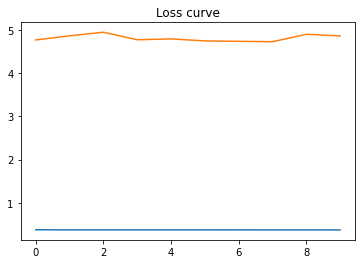

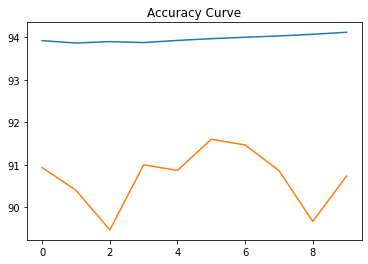

Finished Training


In [0]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
all_pred=[]
targets=[]
for epoch in range(Epochs):  # loop over the dataset multiple times
    vgg16.train()
    acc=[]
    temp=[]
    running_loss = 0.0
    l=0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        l=len(data)
        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update
        
        _,pred=torch.max(outputs.data,dim=1)        
        
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        accuracy=correct*100/total
        temp.append(accuracy)
        losssssList.append(loss.item())
        # running_loss += loss.item()
        # print(running_loss/len(trainloader))
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
            
    targets+=list(labels.view(-1).cpu().numpy())
    all_pred+=(list(pred.view(-1).cpu().numpy()))
    vgg16.eval()
    
    epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
    meanTerror.append(epoch_loss_train)
    
    tAccu=np.asarray(temp)
    meanTrainAccuracy=np.mean(tAccu)
    meanTrain.append(meanTrainAccuracy)

    los,dataLen,validAccu=validLos(validloader)
    epoch_loss = los/ dataLen
    meanVerror.append(epoch_loss)
    acc.append(validAccu)
    acc=np.asarray(acc)

    meanAccu=np.mean(acc)
    meanValid.append(meanAccu)
    print(meanAccu,"Mean Validation Accracy\n",meanTrainAccuracy,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
    torch.save(vgg16.state_dict(), 'vgg16_ft.pth')


plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusionMatrix(targets,all_pred)
print(cm)

[[127  14]
 [  9 170]]


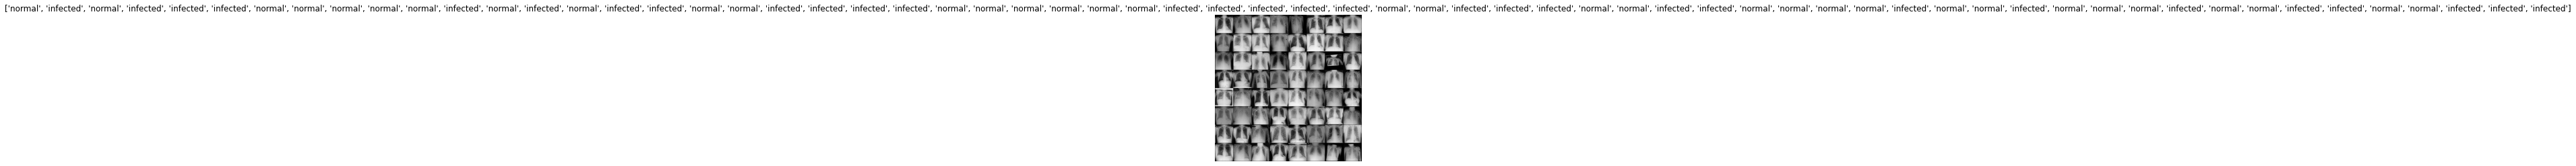

Predicted:  normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal
Ground Truth:  normal infected normal infected infected infected normal normal normal normal normal infected normal infected normal infected infected normal normal infected infected infected infected normal normal normal normal normal normal infected infected infected infected infected normal normal infected infected infected normal normal infected infected normal normal normal normal infected normal normal infected normal normal normal infected normal normal infected infected normal normal infected infected infected
Accuracy of the n

In [0]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# ResNet Task 1

In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])
#pass transform here-in
train_data = torchvision.datasets.ImageFolder(trainPath , transform=train_transforms)
valid_data=torchvision.datasets.ImageFolder(validPath , transform=train_transforms)
test_data = datasets.ImageFolder(testPath, transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True,num_workers=4)
validloader=torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=True,num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True,num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)# Load the pretrained model from pytorch

vgg16 = models.resnet18(pretrained=True)
ftrs=vgg16.fc.in_features
print(vgg16)
# print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

# num_features = vgg16.classifier[6].in_features
# features = list(vgg16.classifier.children())[:] 
for param in vgg16.parameters():
    param.requires_grad = False
# vgg16.classifier[6].out_features = 1000
features=([nn.Linear(512,420),nn.ReLU(inplace=True),nn.Dropout(p=0.5,inplace=False),nn.Linear(420, 2)])

vgg16.fc=nn.Sequential(*features)

# print(features)

# Freeze training for all layers


In [0]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.1, momentum=0.6)
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   

   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss

      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
          # print statistics
      accuracy=correct*100/total
      running_loss += loss.item()
      
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))
   return running_loss,len(data),accuracy

In [0]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
for epoch in range(Epochs):  # loop over the dataset multiple times
    vgg16.train()
    acc=[]
    temp=[]
    running_loss = 0.0
    l=0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        l=len(data)
        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update
        
        _,pred=torch.max(outputs.data,dim=1)        
        
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        accuracy=correct*100/total
        temp.append(accuracy)
        losssssList.append(loss.item())
        # running_loss += loss.item()
        # print(running_loss/len(trainloader))
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
    vgg16.eval()
    
    epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
    meanTerror.append(epoch_loss_train)
    
    tAccu=np.asarray(temp)
    meanTrainAccuracy=np.mean(tAccu)
    meanTrain.append(meanTrainAccuracy)

    los,dataLen,validAccu=validLos(validloader)
    epoch_loss = los/ dataLen
    meanVerror.append(epoch_loss)
    acc.append(validAccu)
    acc=np.asarray(acc)

    meanAccu=np.mean(acc)
    meanValid.append(meanAccu)
    print(meanAccu,"Mean Validation Accracy\n",meanTrainAccuracy,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
    torch.save(vgg16.state_dict(), 'vgg16_ft.pth')

plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')

In [0]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
